In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt


## Creating helper functions

We have created previous functions, however, this is tedious.

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2023-10-28 02:23:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-10-28 02:23:55 (72.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
# IMport helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir


## Lets get some data

This time we're going to see how we can use the pretrained models within tf.keras API

In [4]:
# Get 10% of training data of 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-10-28 02:23:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   174MB/s    in 0.9s    

2023-10-28 02:23:58 (174 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
unzip_data("/content/10_food_classes_10_percent.zip")

In [6]:
# Check out how many images and subdirectories are in our data set
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [7]:
# Create training and test directory paths

train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [8]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size= BATCH_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size= BATCH_SIZE
)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.99943878e+02 2.52117340e+02 2.46943878e+02]
   [1.92637756e+02 2.45637756e+02 2.39637756e+02]
   [1.96153061e+02 2.47647949e+02 2.43142853e+02]
   ...
   [2.43413223e+02 2.53000000e+02 2.43127502e+02]
   [2.42954071e+02 2.52954071e+02 2.42617325e+02]
   [2.42357147e+02 2.53000000e+02 2.40071426e+02]]

  [[1.95229584e+02 2.50301025e+02 2.45443878e+02]
   [1.94688782e+02 2.49760208e+02 2.44903061e+02]
   [1.92632660e+02 2.47704086e+02 2.44734695e+02]
   ...
   [2.41658188e+02 2.52658188e+02 2.44913284e+02]
   [2.42928574e+02 2.53928574e+02 2.46204086e+02]
   [2.43331665e+02 2.54331665e+02 2.46142853e+02]]

  [[1.79729584e+02 2.38086731e+02 2.35872452e+02]
   [1.76076538e+02 2.34433685e+02 2.32219391e+02]
   [1.92673462e+02 2.50862244e+02 2.49244888e+02]
   ...
   [2.38260223e+02 2.50045929e+02 2.47188843e+02]
   [2.39698990e+02 2.51484711e+02 2.48913254e+02]
   [2.40642853e+02 2.52428574e+02 2.48000000e+02]]

  ...

  [[7.34744644e+01 6.05459404e+01 5.71173515e+01]
   [6

### Use a model from tf.keras.applications

In [11]:
# 1. Create base model
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
    include_top=False
)

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224, 3), name="input_layer")

# 4. if using ResNet50V2, you will need to normalzie inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(
#     1./255
# )(inputs)

# 5. Pass the inputs to the base_model

x = base_model(inputs)
print(f"Shape after passing inputs thru base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the input activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

#9. Compile for the model
model_0.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_0.fit(train_data_10_percent,
                      epochs=5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=len(test_data))

24274472/24274472 [==============================] - 0s 0us/step
Shape after passing inputs thru base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Epoch 1/5
24/24 [==============================] - 27s 433ms/step - loss: 1.9279 - accuracy: 0.3827 - val_loss: 1.3635 - val_accuracy: 0.7176
Epoch 2/5
24/24 [==============================] - 8s 320ms/step - loss: 1.1814 - accuracy: 0.7493 - val_loss: 0.9078 - val_accuracy: 0.8160
Epoch 3/5
24/24 [==============================] - 8s 322ms/step - loss: 0.8464 - accuracy: 0.8227 - val_loss: 0.7216 - val_accuracy: 0.8404
Epoch 4/5
24/24 [==============================] - 7s 278ms/step - loss: 0.6884 - accuracy: 0.8613 - val_loss: 0.6294 - val_accuracy: 0.8476
Epoch 5/5
24/24 [==============================] - 8s 312ms/step - loss: 0.6058 - accuracy: 0.8613 - val_loss: 0.5674 - val_accuracy: 0.8608


In [12]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
__________________

In [13]:
model_0.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.5674 - accuracy: 0.8608


[0.5674144625663757, 0.86080002784729]

In [14]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

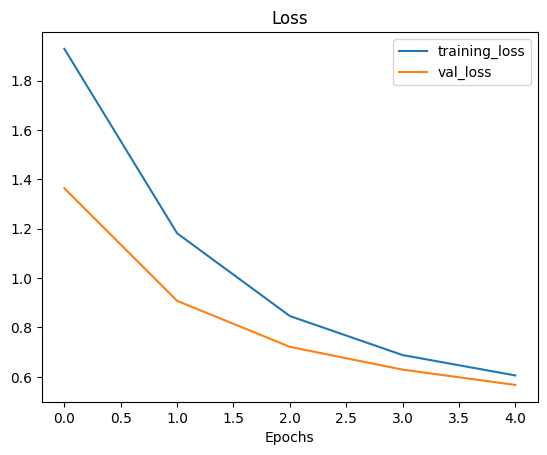

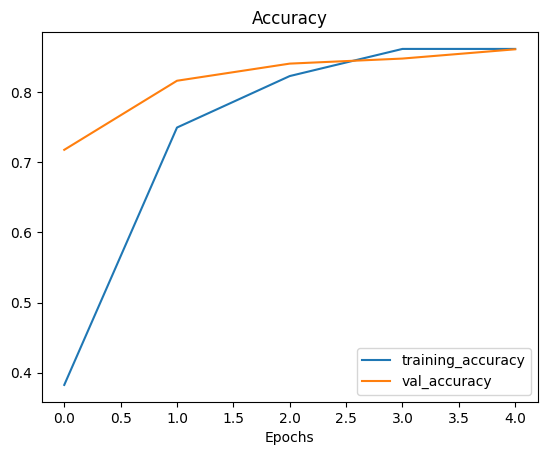

In [15]:
# Check our model's training curves
plot_loss_curves(history_1)

## Getting a feature vector from a trained model

Lets demonstrate the global average pooling 2d layer

base_model>GlobalAverage> (None, 1280)

In [16]:
# Define the input_shape
input_shape = (1, 4, 4,3)

# Create  random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor} \n")

# Pass the random tensor through a gobal average pooling 2d layer
global_avg_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"GAP Tensor {global_avg_pooled_tensor}")

# Check the shape of the different tesnors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of GAP tensor: {global_avg_pooled_tensor.shape}")


Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338894  0.97772694]
   [ 0.24694404  0.20573746 -0.52562326]
   [ 0.32410017  0.02545409 -0.10638496]
   [-0.63694745  1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815628  0.23479679 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]] 

GAP Tensor [[-0.09368646 -0.45840448 -0.2885598 ]]
Shape of input tensor: (1, 4, 4, 3)
Shape of GAP tensor: (1, 3)


In [17]:
# Lets reploicate the GAP2D layer
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [18]:
# Now use globalMaxPool2D

# Pass the random tensor through a gobal average pooling 2d layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"GMP Tensor {global_max_pooled_tensor}")

# Check the shape of the different tesnors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of GMP tensor: {global_max_pooled_tensor.shape}")


GMP Tensor [[0.9058464 1.1603122 1.6994323]]
Shape of input tensor: (1, 4, 4, 3)
Shape of GMP tensor: (1, 3)


# Running a series of experiements

1. model_1: Use feature extraction transfer learning on 1% of the training data with data augmentation.
2. model_2: Use feature extraction transfer learning on 10% of the training data with data augmentation.
3. model_3: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
4. model_4: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

In [19]:

# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-10-28 02:25:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  89.8MB/s    in 1.4s    

2023-10-28 02:25:28 (89.8 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [20]:
# How many images?
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [21]:
# Set up data loaders
IMG_SIZE = (224, 224)
BATCH_SIZE=32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir_1_percent,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

test_data= tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)


Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


##  Adding data augmentation right into a model

To add data augmentation, we can use the layers inside:
* tf.keras.layers.experimental.preprocessing()

Using the tf.keras.layers.experimental.preprocessing module and creating a dedicated data augmentation layer.

This a relatively new feature added to TensorFlow 2.2+ but it's very powerful. Adding a data augmentation layer to the model has the following benefits:

* Preprocessing of the images (augmenting them) happens on the GPU rather than on the CPU (much faster).
 - Images are best preprocessed on the GPU where as text and structured data are more suited to be preprocessed on the CPU.
* Image data augmentation only happens during training so we can still export our whole model and use it elsewhere. And if someone else wanted to train the same model as us, including the same kind of data augmentation, they could.


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontal flipping, ratotations, zooms, etc

data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
   # preprocessing.Rescaling(1./255) # Only for restnet, not for efficienteNet
], name="data_augmentation")

## Visualize our data augmentation layer (and see what happens to our data)

/content/10_food_classes_1_percent/train/chicken_curry
/content/10_food_classes_1_percent/train/chicken_curry/1349027.jpg


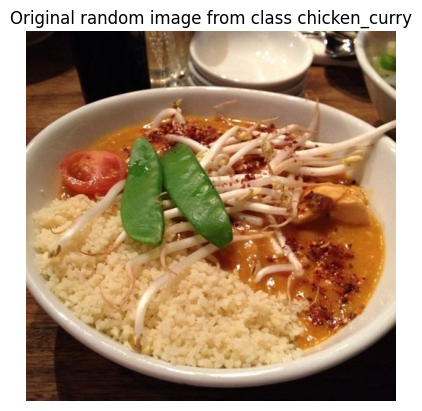

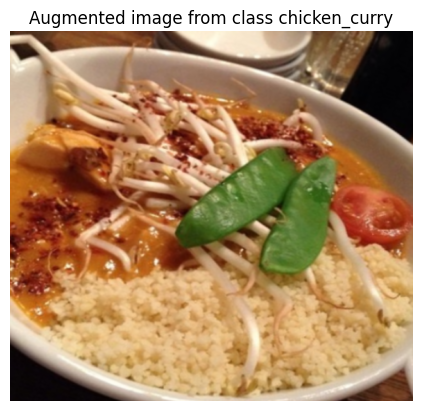

In [23]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_10_percent.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
print(target_dir)

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image
print(random_image_path)

# Read in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

# Now let plot our augmented random image
augmented_img = data_augmentation(img) / 255.
plt.figure()
plt.axis(False)
plt.title(f"Augmented image from class {target_class}")
plt.imshow(augmented_img)


## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [24]:
# Set up input shape and base model, freezing base model layers
input_shape = (224, 224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layers
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add data agumentation
x = data_augmentation(inputs)

# Give base_model the inouts and dont train it
x = base_model(x, training=False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D()(x)

# Put a dense layer on as the ouput
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="1_percent_data_aug")]
                                )


16705208/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20231028-022535
Epoch 1/5
3/3 [==============================] - 19s 6s/step - loss: 2.4416 - accuracy: 0.0429 - val_loss: 2.2546 - val_accuracy: 0.1460
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1831 - accuracy: 0.2286 - val_loss: 2.1342 - val_accuracy: 0.2312
Epoch 3/5
3/3 [==============================] - 8s 4s/step - loss: 2.0104 - accuracy: 0.3000 - val_loss: 2.0260 - val_accuracy: 0.3156
Epoch 4/5
3/3 [==============================] - 8s 4s/step - loss: 1.8138 - accuracy: 0.4857 - val_loss: 1.9271 - val_accuracy: 0.3884
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6322 - accuracy: 0.7143 - val_loss: 1.8337 - val_accuracy: 0.4552


In [25]:
# Check model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, 3)           0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [26]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 6s 68ms/step - loss: 1.8337 - accuracy: 0.4552


[1.8337351083755493, 0.4551999866962433]

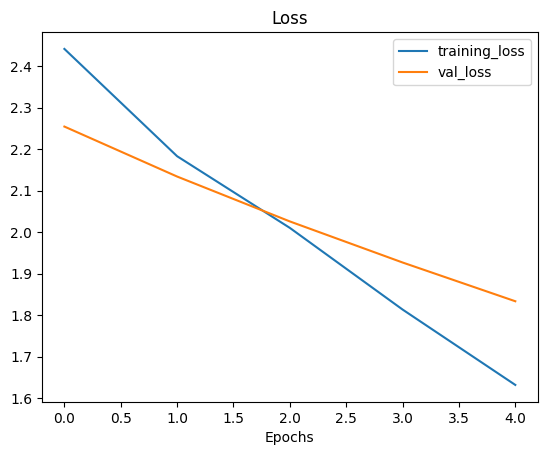

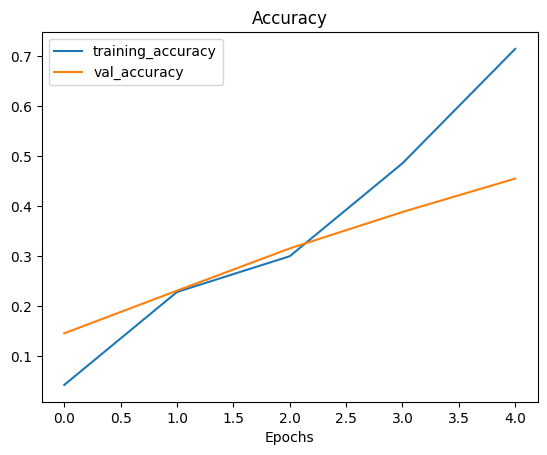

In [27]:
plot_loss_curves(history_1_percent)

## Create model 2

In [54]:

# Make a model using the inputs and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



### Creating a ModelCheckpoint callback

In [55]:
# Set a checpoint path
checkpoint_path = "ten_perncet_model_checkpoint/checkpoint.ckpt"

# Create a ModelChecpoint callback that saves the model's weight only

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbos=1)

### Fit model 2 passing in the ModelCheckponint callback

In [30]:
# Fit the model
history_model_2 = model_2.fit(train_data_10_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_10_percent),
                                validation_data=test_data,
                                validation_steps=len(test_data),
                                callbacks=[checkpoint_callback, create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="10_percent_data_aug")]
                                )

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20231028-022644
Epoch 1/5
24/24 [==============================] - 29s 904ms/step - loss: 1.6333 - accuracy: 0.5373 - val_loss: 1.1493 - val_accuracy: 0.7468
Epoch 2/5
24/24 [==============================] - 22s 906ms/step - loss: 1.1258 - accuracy: 0.7440 - val_loss: 0.8519 - val_accuracy: 0.8092
Epoch 3/5
24/24 [==============================] - 21s 879ms/step - loss: 0.8970 - accuracy: 0.7840 - val_loss: 0.7156 - val_accuracy: 0.8252
Epoch 4/5
24/24 [==============================] - 15s 619ms/step - loss: 0.7819 - accuracy: 0.8053 - val_loss: 0.6391 - val_accuracy: 0.8408
Epoch 5/5
24/24 [==============================] - 16s 640ms/step - loss: 0.6809 - accuracy: 0.8373 - val_loss: 0.5865 - val_accuracy: 0.8472


In [31]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.5674 - accuracy: 0.8608


[0.5674139857292175, 0.86080002784729]

In [32]:
results_model_2 = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.5865 - accuracy: 0.8472


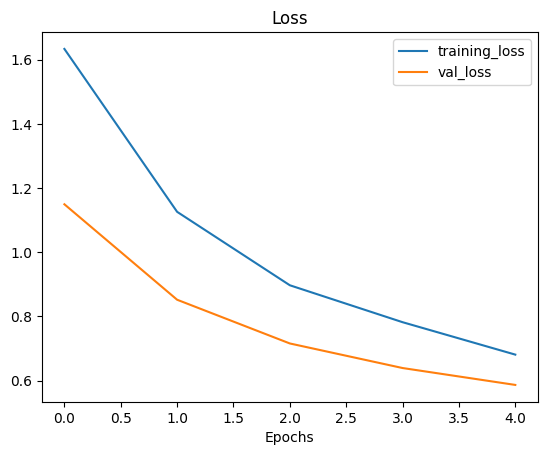

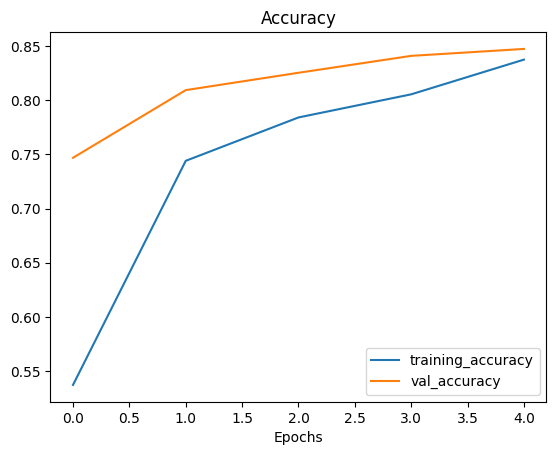

In [33]:
plot_loss_curves(history_model_2)

### Loading checkpoint

In [34]:
# Load checkpoint
model_2.load_weights(checkpoint_path)


In [35]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 77ms/step - loss: 0.5865 - accuracy: 0.8472


In [36]:
# Check if matches
results_model_2 == loaded_weights_model_results

False

In [37]:
# Check to see if loaded model results are very close to our previous non loaded results
import numpy as np
np.isclose(np.array(results_model_2), np.array(loaded_weights_model_results))

array([ True,  True])

## Model 3: Fine-tuning an existing model

In [38]:
# Layers in loaded
model_2.layers

In [39]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7b334ecec5e0> True
<keras.src.engine.sequential.Sequential object at 0x7b334ec2c9d0> True
<keras.src.engine.functional.Functional object at 0x7b334b329240> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7b33ea2fbb20> True
<keras.src.layers.core.dense.Dense object at 0x7b334b343370> True


In [40]:
# What layers are in our base_model
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layers, layer.trainable)


0 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
1 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
2 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
3 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
4 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
5 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
6 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/layers/__init__.py'> False
7 <module 'keras.api._v2.keras.layers' from '/usr/local/lib/python3.10/dist-

In [41]:
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile model_2
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), # When fine-tunning, low the learning by 10x
    metrics=['accuracy']
)

When using fine tunning, low the learning rate as best practice. A good rule of thumb it to low it at least by 10x

In [42]:
# What layers are in our base_model
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)


0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 rescaling_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [43]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit the model same as model_2 except with more layers
history_fine_10_percent_data_aug = model_2.fit(
    train_data_10_percent,
    epochs=fine_tune_epochs,
    validation_data=test_data,
    validation_steps=(len(test_data)),
    initial_epoch=history_model_2.epoch[-1], # start training from previos last epoch
    callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                       experiment_name="10_percent_fine_tune_last_10")]
                                )



Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20231028-022928
Epoch 5/10
24/24 [==============================] - 26s 656ms/step - loss: 0.6050 - accuracy: 0.8267 - val_loss: 0.4776 - val_accuracy: 0.8512
Epoch 6/10
24/24 [==============================] - 15s 605ms/step - loss: 0.4744 - accuracy: 0.8587 - val_loss: 0.4454 - val_accuracy: 0.8540
Epoch 7/10
24/24 [==============================] - 14s 596ms/step - loss: 0.4184 - accuracy: 0.8747 - val_loss: 0.4392 - val_accuracy: 0.8540
Epoch 8/10
24/24 [==============================] - 18s 739ms/step - loss: 0.3629 - accuracy: 0.8987 - val_loss: 0.4189 - val_accuracy: 0.8588
Epoch 9/10
24/24 [==============================] - 14s 583ms/step - loss: 0.3362 - accuracy: 0.9000 - val_loss: 0.4211 - val_accuracy: 0.8580
Epoch 10/10
24/24 [==============================] - 14s 562ms/step - loss: 0.3173 - accuracy: 0.9093 - val_loss: 0.4227 - val_accuracy: 0.8568


In [44]:
# Evaluate the fune tuned model (model_3) which is actualy model_2 fine tuned for another 5 epochs

results_fine_tune_10_percent = model_2.evaluate(test_data)



79/79 [==============================] - 7s 78ms/step - loss: 0.4227 - accuracy: 0.8568


In [45]:
results_fine_tune_10_percent

[0.42265719175338745, 0.8568000197410583]

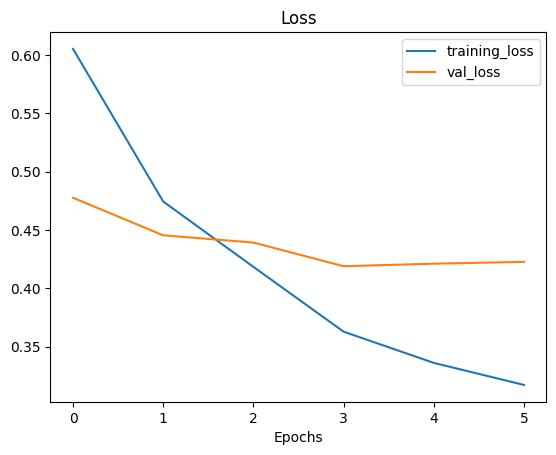

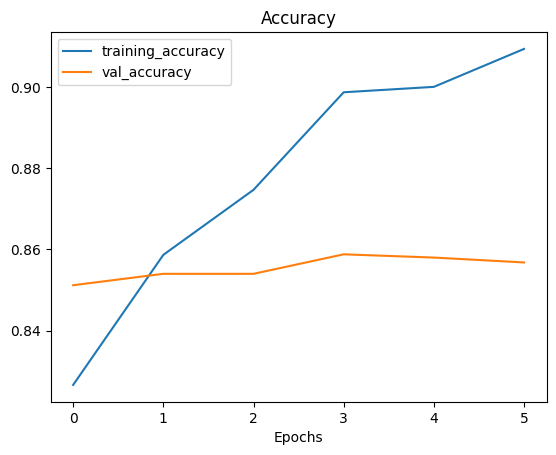

In [46]:
# Check out the loss curves of fine tuned model
plot_loss_curves(history_fine_10_percent_data_aug)

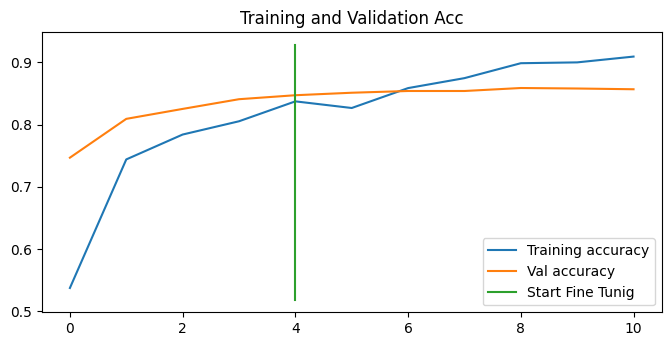

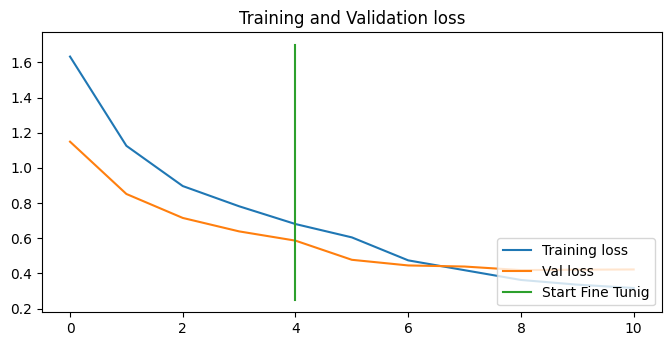

In [48]:
# create a function to compare training histories

def compare_history(oginial_history, new_history, initla_epochs=5):
  """
  Compare two Tenforflow History objects
  """
  # Get original history measurements
  acc = oginial_history.history['accuracy']
  loss = oginial_history.history['loss']

  val_acc = oginial_history.history['val_accuracy']
  val_loss = oginial_history.history['val_loss']

  # Combine original history
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plots for acuracy
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,1)
  plt.plot(total_acc, label="Training accuracy")
  plt.plot(total_val_acc, label="Val accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tunig")
  plt.legend(loc="lower right")
  plt.title("Training and Validation Acc")

  # Make plots for loss
  plt.figure(figsize=(8,8))
  plt.subplot(2,1,2)
  plt.plot(total_loss, label="Training loss")
  plt.plot(total_val_loss, label="Val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tunig")
  plt.legend(loc="lower right")
  plt.title("Training and Validation loss")

compare_history(
    history_model_2,
    history_fine_10_percent_data_aug
)




## Model_4: Fine Tuning and existig model on all of the data

In [49]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-10-28 02:31:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 173.194.203.207, 74.125.199.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  65.3MB/s    in 7.9s    

2023-10-28 02:31:44 (62.8 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [50]:
# How many images are we working with now
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.

In [51]:
# Set up data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    image_size=IMG_SIZE
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
   test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test data we have loaded in is te same as what we ve been using for previos models


In [52]:
# Evaluate model 2 (this is the fine tuned on 10%)
model_2.evaluate(test_data)

79/79 [==============================] - 6s 68ms/step - loss: 0.4227 - accuracy: 0.8568


[0.42265722155570984, 0.8568000197410583]

To train a fine tuning model, we need to revert model_2 back to its feature extraction weights

In [56]:
# Load weights from checkpoint
model_2.load_weights(checkpoint_path)

In [57]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 76ms/step - loss: 0.5865 - accuracy: 0.8472


[0.586492657661438, 0.8471999764442444]

Alright, the previous steps might seem quite confusing but all we've done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint.
2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen.
3. Saved the results and training logs each time.
4. Reloaded the model from 1 to do the same steps as 2 but with all of the data.
The same steps as 2?

Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [58]:

# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_1 True
4 output_layer True


In [59]:

# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 rescaling_1 False
2 normalization_1 False
3 rescaling_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [60]:
# Re compile
model_2.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
  metrics=['accuracy']
)

In [62]:
# Continue to train and fine tube to out model
fine_tune_epochs = initial_epochs + 10

histoy_fune_10_classes_full = model_2.fit(
    train_data_10_classes_full,
    epochs= fine_tune_epochs,
    validation_data = test_data,
    validation_steps=len(test_data),
    initial_epoch=history_fine_10_percent_data_aug.epoch[-1],
    callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
    experiment_name="full_10_classes_fine_tune")]

)

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune/20231028-024259
Epoch 10/15
235/235 [==============================] - 69s 291ms/step - loss: 0.5614 - accuracy: 0.8173 - val_loss: 0.3464 - val_accuracy: 0.8896
Epoch 11/15
235/235 [==============================] - 60s 255ms/step - loss: 0.4874 - accuracy: 0.8421 - val_loss: 0.2988 - val_accuracy: 0.9052
Epoch 12/15
235/235 [==============================] - 54s 230ms/step - loss: 0.4279 - accuracy: 0.8599 - val_loss: 0.2955 - val_accuracy: 0.9052
Epoch 13/15
235/235 [==============================] - 59s 250ms/step - loss: 0.3970 - accuracy: 0.8728 - val_loss: 0.2833 - val_accuracy: 0.9072
Epoch 14/15
235/235 [==============================] - 49s 208ms/step - loss: 0.3661 - accuracy: 0.8807 - val_loss: 0.2808 - val_accuracy: 0.9080
Epoch 15/15
235/235 [==============================] - 57s 239ms/step - loss: 0.3351 - accuracy: 0.8916 - val_loss: 0.2721 - val_accuracy: 0.9132


In [63]:
# Lets evaluate on all of the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 6s 73ms/step - loss: 0.2721 - accuracy: 0.9132


[0.2720877528190613, 0.9132000207901001]

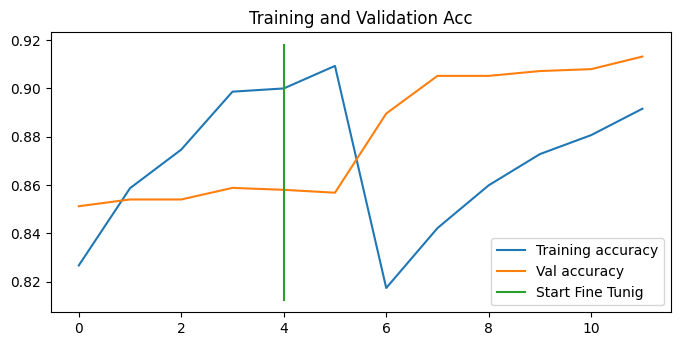

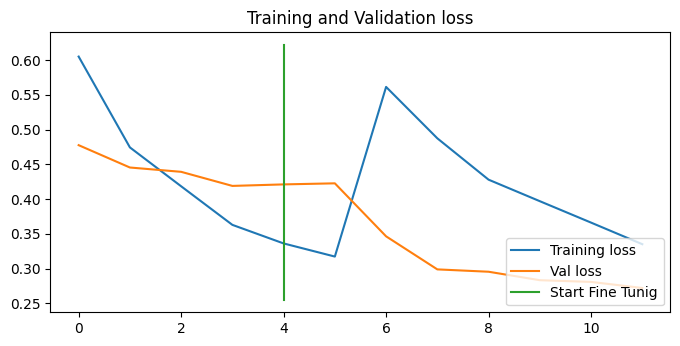

In [64]:
# How did fine tunning go with more data?
compare_history(history_fine_10_percent_data_aug,histoy_fune_10_classes_full )

## Viewing our experiment data on Tensorboard

In [ ]:
# View Tensorboard logs onf transfer learning modelling experiments
# Upload tensorboard dev records
!tensorboard dev upload --logdir /content/transfer_learning \
--name "TransFer Learning Experiments with 10 Food101 Classes" \
--description "Test" \
--one_shot # Exit once its finished uploading